In [1]:
options(jupyter.rich_display = FALSE)
options(repr.plot.width=6, repr.plot.height=4)

Factors and categories
------
Consider the following data table:

|Name|Gender|Month of Birth|
|----|----|-----|
|Can|Male|January|
|Cem|Male|July|
|Hande|Female|May|
|Mehmet|Male|May|
|Deniz|Female|February|
|Kemal|Male|July|
|Derya|Female|May|
|Fatma|Female|April|

There is only one way of representating the names, as a vector of character mode.

In [2]:
name <- c("Can","Cem","Hande","Mehmet","Deniz","Kemal","Derya","Fatma")

We might at first represent the gender information in the same way:

In [3]:
gender <- c("Male","Male","Female","Male","Female","Male","Female","Female")
gender

[1] "Male"   "Male"   "Female" "Male"   "Female" "Male"   "Female" "Female"

In [4]:
mode(gender)

[1] "character"

Alternatively, it is also possible to convert this information to a _factor_, or a categorical variable, using the `factor()` function.

In [5]:
gender_fac <- factor(gender)
gender_fac

[1] Male   Male   Female Male   Female Male   Female Female
Levels: Female Male

The factor vector looks the same as the character vector, but it has an additional attribute, the _levels_ information.

In [6]:
levels(gender_fac)

[1] "Female" "Male"  

The `nlevels()` function returns the number of levels:

In [7]:
nlevels(gender_fac)

[1] 2

Also, common R functions for analysis and data description handles factors in specialized ways.

In [9]:
summary(gender)

   Length     Class      Mode 
        8 character character 

In [11]:
summary(gender_fac)

Female   Male 
     4      4 

One can change the level names easily using an assignment to the `levels()` function.

In [12]:
levels(gender_fac) <- c("F","M")
gender_fac

[1] M M F M F M F F
Levels: F M

Internally, categories are represented with integers starting at 1.

Indexing and subsetting
----
Factor-valued vectors are subsetted in the same way as any other vector.

In [13]:
print(gender_fac[2:5])

[1] M F M F
Levels: F M


In [15]:
gender_fac[c(3,5,7:8)]

[1] F F F F
Levels: F M

Note that after subsetting a factor object, the object continues to store
all defined levels even if some of the levels are no longer represented in the
subsetted object.

We can use logical comparisons to obtain a vector of Booleans:

In [17]:
gender_fac

[1] M M F M F M F F
Levels: F M

In [16]:
gender_fac=="M"

[1]  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE

This Boolean vector can then be used to extract fields of another vector that corresponds to `TRUE` elements:

In [20]:
name

[1] "Can"    "Cem"    "Hande"  "Mehmet" "Deniz"  "Kemal"  "Derya"  "Fatma" 

In [19]:
name[gender_fac=="M"]

[1] "Can"    "Cem"    "Mehmet" "Kemal" 

Removing categories
----
Suppose that the category entries have typos them, and the same category is expressed in two or more ways. For example:

In [21]:
gender <- c("Male","Male","Female","Male","female","Male","female","Female")

In [22]:
gender_fac <- factor(gender)
gender_fac

[1] Male   Male   Female Male   female Male   female Female
Levels: female Female Male

We seem to have three levels, but actually `"female"` and `"Female"` should be the same. This can be easily fixed by overwriting all occurrences of `"female"` with `"Female"`.

In [25]:
gender_fac[gender_fac=="female"] <- "Female"
gender_fac

[1] Male   Male   Female Male   Female Male   Female Female
Levels: female Female Male

However, the levels attribute still lists the invalid `"female"` category. To remove it, we use the `droplevels()` function. It removes all levels for which there are no entries.

In [26]:
gender_fac <- droplevels(gender_fac)
gender_fac

[1] Male   Male   Female Male   Female Male   Female Female
Levels: Female Male

Ordinal factors and ordered categories
-----
The _gender_ factor is an example of a _nominal factor_: There is no inherent order between levels. We cannot ask the question whether "Male" is greater than "Female" or not.

The _month of birth_ information is an _ordinal factor_: Months appear in a certain order, so it makes sense to say that "January" < "February".

Let’s store the observed month-of-birth (MOB) data from earlier as a character vector.

In [27]:
mob <- c("January","July","May","May","February","July","May","April")

There are two problems with the data in this vector:

1. Only five unique months. Not all possible categories are represented.
2. Doesn’t reflect the natural order of the months. If you compare January and February to see which is greater, you get:

In [28]:
mob[1] < mob[5]

[1] FALSE

This is alphabetically correct (_F_ comes before _J_); however, it is not the ordering we want.

When we create a factor object, we can set the parameters of the `factor()` function such that it holds all the categories of the factor, and in the correct order.

In [29]:
months <- c("January","February","March","April","May",
            "June","July","August","September","October","November","December")

In [30]:
mob_fac <- factor(mob, levels=months, ordered=TRUE)
mob_fac

[1] January  July     May      May      February July     May      April   
12 Levels: January < February < March < April < May < June < ... < December

In [31]:
mob_fac[1] < mob_fac[5]

[1] TRUE

In [32]:
summary(mob_fac)

  January  February     March     April       May      June      July    August 
        1         1         0         1         3         0         2         0 
September   October  November  December 
        0         0         0         0 

Combining two factor objects
---
Earlier we have seen that combining two vectors into a single vector is done with the `c()` function:

In [33]:
x1 <- c(1,2,3,4)
x2 <- c(7,8,9)
c(x1, x2)

[1] 1 2 3 4 7 8 9

However, this does not work with factor objects:

In [34]:
mob_fac

[1] January  July     May      May      February July     May      April   
12 Levels: January < February < March < April < May < June < ... < December

In [42]:
mob2 <- factor(c("April","March","May"), levels=months, ordered=TRUE)
mob2

[1] April March May  
12 Levels: January < February < March < April < May < June < ... < December

In [43]:
c(mob_fac, mob2)

 [1] 1 7 5 5 2 7 5 4 4 3 5

All we get is a vector of integers. These integers actually correspond to the numeric values of categories, as you can check. The `c()` function just combines these values, which is not what we want.

Factors are combined in an indirect way: We use the result of `c()` to index the `months` vector, which holds an ordered list of all categories. This will give a character vector:

In [44]:
levels(mob_fac)[ c(mob_fac, mob2) ]

 [1] "January"  "July"     "May"      "May"      "February" "July"    
 [7] "May"      "April"    "April"    "March"    "May"     

Then we convert this to a factor object

In [45]:
factor(levels(mob_fac)[ c(mob_fac, mob2) ], levels=levels(mob_fac), ordered=TRUE)

 [1] January  July     May      May      February July     May      April   
 [9] April    March    May     
12 Levels: January < February < March < April < May < June < ... < December

A better and more general approach is to use the `levels(mob_fac)` instead of `months`:

In [39]:
factor(levels(mob_fac)[ c(mob_fac, mob2) ], levels=levels(mob_fac), ordered=TRUE)

 [1] January  July     May      May      February July     May      April   
 [9] April    March    May     
12 Levels: January < February < March < April < May < June < ... < December

If we happen to use this task frequently, we can write a function for it:

In [40]:
concat_factors <- function(f1, f2, ordered=TRUE) {
    stopifnot( identical(levels(f1), levels(f2)) ) # ensure that the levels are the same
    return( factor(levels(f1)[ c(f1,f2) ], levels=levels(f1), ordered=ordered) )
}

In [41]:
concat_factors(mob_fac, mob2)

 [1] January  July     May      May      February July     May      April   
 [9] April    March    May     
12 Levels: January < February < March < April < May < June < ... < December

Binning
----
One can create categories from continuous data, such as Small/Medium/Large, or Low/High. Consider the following numeric vector:

In [46]:
x <- c(11, 18, 36, 74, 43, 81, 95, 64, 32, 51)

Suppose we want to categorize this data as _small_ for values in [0, 30), _medium_ for [30, 70), and _high_ for [70, 100]. The notation [30,70) means that the value 30 belongs to this category, but 70 does not.

In [47]:
br <- c(0, 30, 70, 100)

The `cut()` function generates a factor object with the interval end specified by the `breaks` parameter.

In [48]:
cut(x, breaks=br)

 [1] (0,30]   (0,30]   (30,70]  (70,100] (30,70]  (70,100] (70,100] (30,70] 
 [9] (30,70]  (30,70] 
Levels: (0,30] (30,70] (70,100]

However, note that the ends of the intervals are not as we want. The first value of the boundary in not included in the interval, but the second value is. To fix this, we set the parameter `right` to `FALSE`.

In [49]:
cut(x, breaks=br, right = F)

 [1] [0,30)   [0,30)   [30,70)  [70,100) [30,70)  [70,100) [70,100) [30,70) 
 [9] [30,70)  [30,70) 
Levels: [0,30) [30,70) [70,100)

But the last value 100 is excluded now. We can include it by setting the `include.lowest` parameter to `TRUE`.

In [50]:
cut(x, breaks=br, right = F, include.lowest = T)

 [1] [0,30)   [0,30)   [30,70)  [70,100] [30,70)  [70,100] [70,100] [30,70) 
 [9] [30,70)  [30,70) 
Levels: [0,30) [30,70) [70,100]

The levels can be set with the `labels` parameter.

In [51]:
cut(x, breaks=br, right = F, include.lowest = T,
   labels = c("Low","Medium","High"))

 [1] Low    Low    Medium High   Medium High   High   Medium Medium Medium
Levels: Low Medium High

Factors and data frames
----
Suppose that we create a data frame out of `names`, `gender`, and `mob` vectors:

In [53]:
df <- data.frame(name, gender, mob)
df

  name   gender mob     
1 Can    Male   January 
2 Cem    Male   July    
3 Hande  Female May     
4 Mehmet Male   May     
5 Deniz  female February
6 Kemal  Male   July    
7 Derya  female May     
8 Fatma  Female April   

In [54]:
summary(df)

      name      gender        mob   
 Can    :1   female:2   April   :1  
 Cem    :1   Female:2   February:1  
 Deniz  :1   Male  :4   January :1  
 Derya  :1              July    :2  
 Fatma  :1              May     :3  
 Hande  :1                          
 (Other):2                          

Note that all fields are interpreted as factors in `df`, including `names`. The reason is that the `stringsAsFactors`parameter is `TRUE` by default. We can turn it off, and use the factor vectors we prepared before:

In [55]:
df <- data.frame(name, gender_fac, mob_fac, stringsAsFactors = FALSE )
summary(df)

     name            gender_fac     mob_fac 
 Length:8           Female:4    May     :3  
 Class :character   Male  :4    July    :2  
 Mode  :character               January :1  
                                February:1  
                                April   :1  
                                March   :0  
                                (Other) :0  

As another example, consider the _mtcars_ data set:

In [56]:
head(mtcars)

                  mpg  cyl disp hp  drat wt    qsec  vs am gear carb
Mazda RX4         21.0 6   160  110 3.90 2.620 16.46 0  1  4    4   
Mazda RX4 Wag     21.0 6   160  110 3.90 2.875 17.02 0  1  4    4   
Datsun 710        22.8 4   108   93 3.85 2.320 18.61 1  1  4    1   
Hornet 4 Drive    21.4 6   258  110 3.08 3.215 19.44 1  0  3    1   
Hornet Sportabout 18.7 8   360  175 3.15 3.440 17.02 0  0  3    2   
Valiant           18.1 6   225  105 2.76 3.460 20.22 1  0  3    1   

The `summary()` function returns the summary statistics for each numeric field. However, it makes more sense to treat `"cyl"`, `"vs"`, `"am"`, `"gear"` and `"carb"` as categorical variables.

In [57]:
summary(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

In [58]:
mtcars$cyl <- factor(mtcars$cyl, ordered=TRUE)
mtcars$gear <- factor(mtcars$gear, ordered=TRUE)
mtcars$carb <- factor(mtcars$carb, ordered=TRUE)
mtcars$vs <- factor(mtcars$vs)
mtcars$am <- factor(mtcars$am)

Now we can use the `summary()` function to get the counts of categories in each factor field.

In [59]:
summary(mtcars)

      mpg        cyl         disp             hp             drat      
 Min.   :10.40   4:11   Min.   : 71.1   Min.   : 52.0   Min.   :2.760  
 1st Qu.:15.43   6: 7   1st Qu.:120.8   1st Qu.: 96.5   1st Qu.:3.080  
 Median :19.20   8:14   Median :196.3   Median :123.0   Median :3.695  
 Mean   :20.09          Mean   :230.7   Mean   :146.7   Mean   :3.597  
 3rd Qu.:22.80          3rd Qu.:326.0   3rd Qu.:180.0   3rd Qu.:3.920  
 Max.   :33.90          Max.   :472.0   Max.   :335.0   Max.   :4.930  
       wt             qsec       vs     am     gear   carb  
 Min.   :1.513   Min.   :14.50   0:18   0:19   3:15   1: 7  
 1st Qu.:2.581   1st Qu.:16.89   1:14   1:13   4:12   2:10  
 Median :3.325   Median :17.71                 5: 5   3: 3  
 Mean   :3.217   Mean   :17.85                        4:10  
 3rd Qu.:3.610   3rd Qu.:18.90                        6: 1  
 Max.   :5.424   Max.   :22.90                        8: 1  

The `"vs"` (V engine or straight) and `"am"` (Automatic or manual transmission) fields have level values 0 or 1. Let's replace them with clearer labels.

In [60]:
levels(mtcars$vs) <- c("V-engine","Standard")
levels(mtcars$am) <- c("Automatic","Manual")

In [61]:
summary(mtcars)

      mpg        cyl         disp             hp             drat      
 Min.   :10.40   4:11   Min.   : 71.1   Min.   : 52.0   Min.   :2.760  
 1st Qu.:15.43   6: 7   1st Qu.:120.8   1st Qu.: 96.5   1st Qu.:3.080  
 Median :19.20   8:14   Median :196.3   Median :123.0   Median :3.695  
 Mean   :20.09          Mean   :230.7   Mean   :146.7   Mean   :3.597  
 3rd Qu.:22.80          3rd Qu.:326.0   3rd Qu.:180.0   3rd Qu.:3.920  
 Max.   :33.90          Max.   :472.0   Max.   :335.0   Max.   :4.930  
       wt             qsec              vs             am     gear   carb  
 Min.   :1.513   Min.   :14.50   V-engine:18   Automatic:19   3:15   1: 7  
 1st Qu.:2.581   1st Qu.:16.89   Standard:14   Manual   :13   4:12   2:10  
 Median :3.325   Median :17.71                                5: 5   3: 3  
 Mean   :3.217   Mean   :17.85                                       4:10  
 3rd Qu.:3.610   3rd Qu.:18.90                                       6: 1  
 Max.   :5.424   Max.   :22.90          

Plotting factor variables
------------
When we specify a factor-type vector as data, the `plot()` function displays a bar plot.

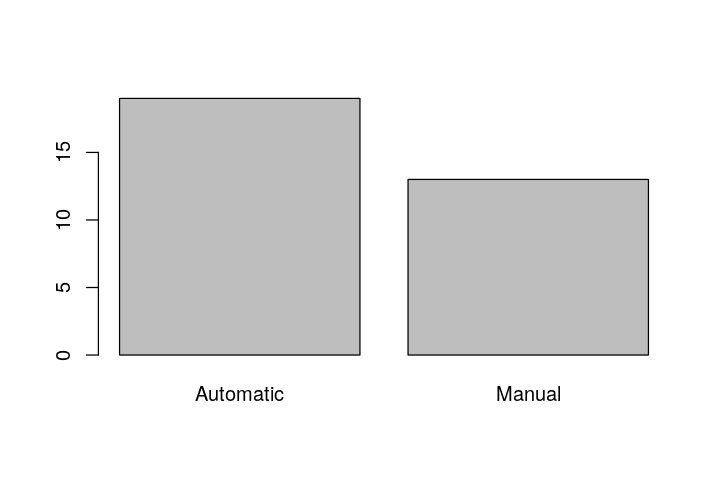

In [62]:
plot(mtcars$am)

When the x-axis is categorical and the y-axis is numerical, a boxplot is displayed.

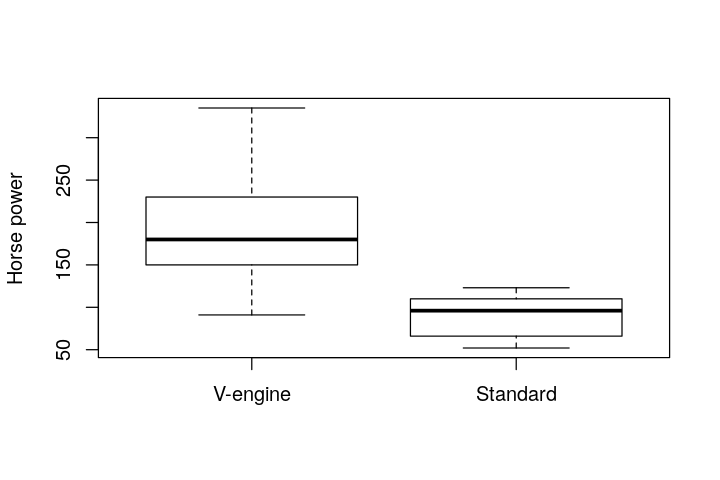

In [49]:
plot(x = mtcars$vs, y=mtcars$hp,ylab="Horse power")

If both axes are categorical, a stacked bar plot is displayed.

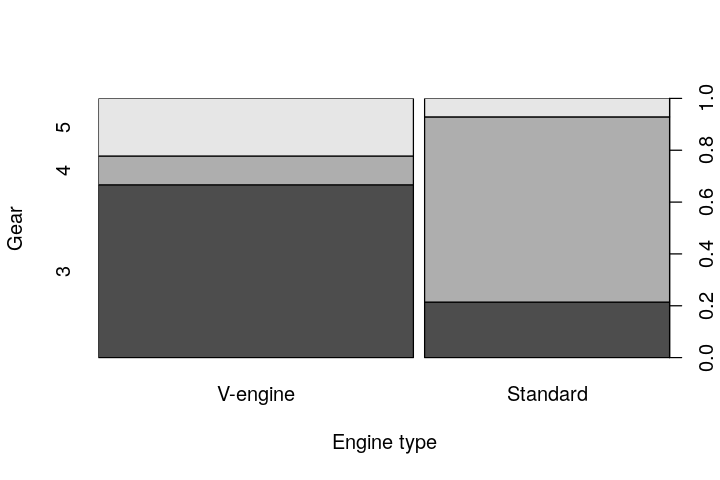

In [63]:
plot(x = mtcars$vs, y=mtcars$gear, xlab="Engine type",ylab="Gear")